# Objective

## Objective
### Yulu wants to know, 
*   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*   How well those variables describe the electric cycle demands

### Import Packages

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')


### Import/Read Data

In [2]:
# Import/Read dataset
yulu_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

# Statistical Summary

### Meta-Data of Dataset

#### Basic Info of the dataset

In [ ]:
# Basic info about the dataset
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Size of the dataset

In [ ]:
# Size of the dataset
yulu_df.size

130632

#### Number of Rows and Columns

In [ ]:
# Number of Rows and columns in the dataset
print("Yulu dataset contains {} rows and {} columns".format(yulu_df.shape[0], yulu_df.shape[1]))

Yulu dataset contains 10886 rows and 12 columns


#### Numerical data in the dataset

In [ ]:
# Numerical columns in the dataset
yulu_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#### Categorical data in the dataset

In [ ]:
# Categorical columns in the dataset
yulu_df.describe(include="O")

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


#### List of Columns

In [ ]:
# Column Nams
list(yulu_df.columns)

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

#### Datatypes of Columns

In [ ]:
# Datatype of the columns
yulu_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
# First 5 Rows
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### Column - Unique values Count

# Data Pre-Processing

#### Copy dataset

In [3]:
# Take a copy of the dataset
yulu = yulu_df.copy()

#### Null value check

In [ ]:
# Check for Null Values
yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
yulu.isnull().sum().sum()

0

##### **Insight**: *There is no null value in the given dataset*

#### Check for duplicates

In [ ]:
yulu.duplicated().sum()

0

##### **Insight**: *There is no duplicate in the given dataset*

In [ ]:
# Unique values of each column
yulu.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

#### Convert to appropriate type

In [ ]:
# Check for Season values
yulu['season'].unique()

array([1, 2, 3, 4])

In [ ]:
# Convert the season to category type
yulu['season'] = yulu['season'].astype('category')

In [ ]:
yulu['season'].replace([1,2,3,4],['Spring','Summer', 'Fall', 'Winter'],inplace=True)

In [ ]:
yulu['season'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [ ]:
yulu['holiday'].unique()

array([0, 1])

In [ ]:
yulu['holiday'].replace([0,1], ['No', 'Yes'], inplace=True)

In [ ]:
yulu['workingday'].unique()

array([0, 1])

In [ ]:
yulu['workingday'].replace([0,1], ['No', 'Yes'], inplace=True)

In [ ]:
yulu['weather'].unique()

array([1, 2, 3, 4])

In [ ]:
yulu['weather'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

In [ ]:
yulu.dtypes

datetime       object
season         object
holiday        object
workingday     object
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Exploratory Data Analysis (EDA)

In [ ]:
# % of sales per season
round(yulu['season'].value_counts(normalize=True)*100, 2)

Winter    25.11
Fall      25.11
Summer    25.11
Spring    24.67
Name: season, dtype: float64

Winter    2734
Fall      2733
Summer    2733
Spring    2686
Name: season, dtype: int64


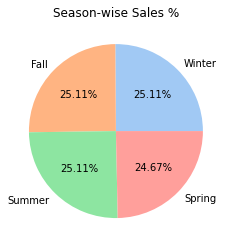

In [ ]:
print(yulu['season'].value_counts())
colors = sns.color_palette('pastel')[0:len(yulu['season'].value_counts())]
plt.pie(yulu['season'].value_counts(),labels = yulu['season'].value_counts().index.tolist(),colors = colors, autopct='%.2f%%')
plt.title("Season-wise Sales %")
plt.show()

##### **Insight**: *Almost all the four seasons have equal % and count*

In [ ]:
# % of sales per weather type
round(yulu['weather'].value_counts(normalize=True)*100, 2)

Clear_Few Clouds                            66.07
Mist_cloudy                                 26.03
Light rain_Light snow_Thunderstorm           7.89
Heavy Rain_Ice Pallets_Thunderstorm_Mist     0.01
Name: weather, dtype: float64

Clear_Few Clouds                            7192
Mist_cloudy                                 2834
Light rain_Light snow_Thunderstorm           859
Heavy Rain_Ice Pallets_Thunderstorm_Mist       1
Name: weather, dtype: int64


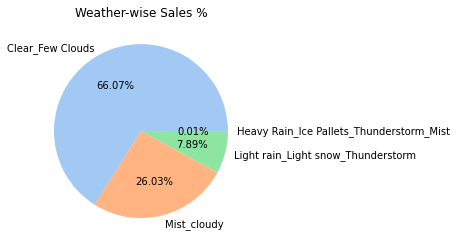

In [ ]:
print(yulu['weather'].value_counts())
colors = sns.color_palette('pastel')[0:len(yulu['weather'].value_counts())]
plt.pie(yulu['weather'].value_counts(),labels = yulu['weather'].value_counts().index.tolist(),colors = colors, autopct='%.02f%%')
plt.title("Weather-wise Sales %")
plt.show()

##### **Insight**: *Clear-weather has higher % and Count as compared to other weather types*

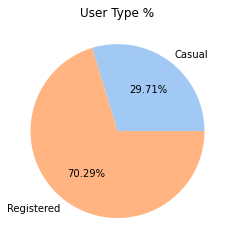

In [ ]:
user_type = (yulu['casual'].nunique(), yulu['registered'].nunique())
user_type

# colors = sns.color_palette('pastel')
# plt.pie(user_type)
colors = sns.color_palette('pastel')[0:len(user_type)]
plt.pie(user_type,labels = ['Casual', 'Registered'], colors = colors, autopct='%.02f%%')
plt.title("User Type %")
plt.show()

##### **Insight**: *Registered Users have higher % and Count than Casual users*

In [ ]:
# Segregate numerical columns
numerical_columns = yulu.select_dtypes([np.int64, np.float64])

#### Pairplots to understand Numerical Variables

<function matplotlib.pyplot.show(*args, **kw)>

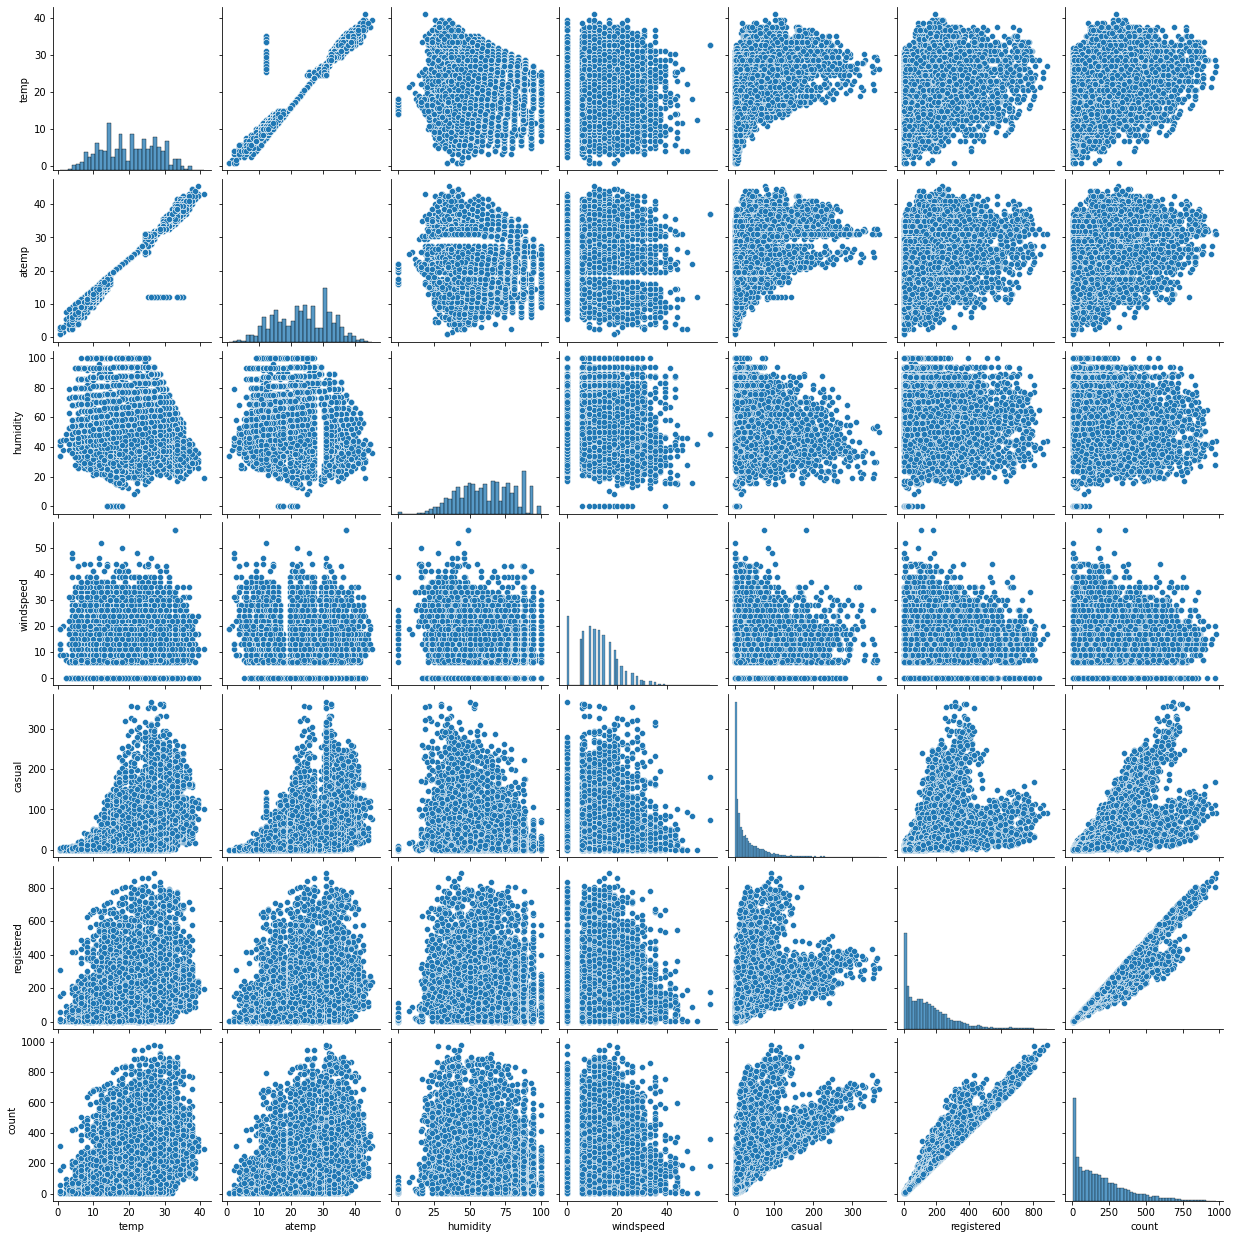

In [ ]:
sns.pairplot(yulu, vars=numerical_columns)
plt.show

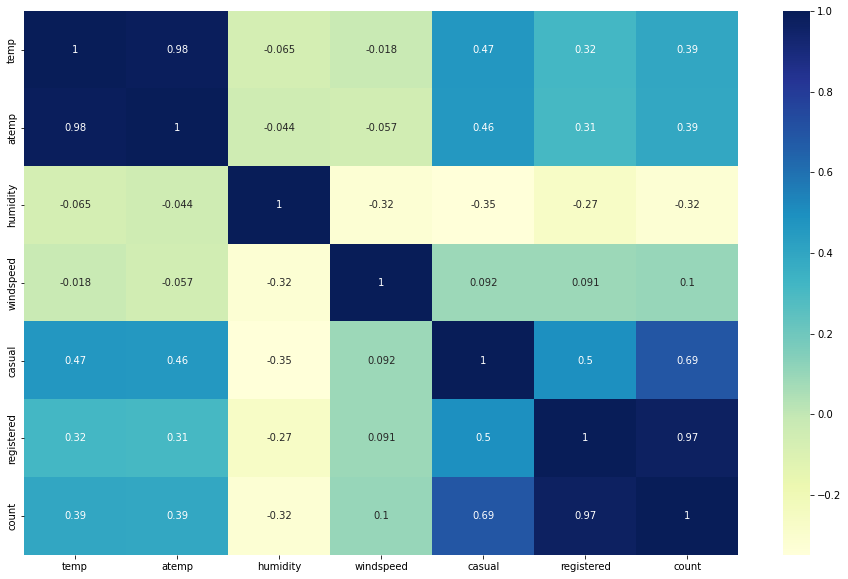

In [ ]:
# from above graphs temp and atemp seems to have a relationship
# let's check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(yulu.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
# correlation between temp and atemp is 0.98 which is close to 1
# Let's drop atemp and consider temp

yulu.drop(['atemp'],axis=1,inplace=True)
yulu.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,No,No,Clear_Few Clouds,9.84,81,0.0,3,13,16
1,2011-01-01 01:00:00,Spring,No,No,Clear_Few Clouds,9.02,80,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,No,No,Clear_Few Clouds,9.02,80,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,No,No,Clear_Few Clouds,9.84,75,0.0,3,10,13
4,2011-01-01 04:00:00,Spring,No,No,Clear_Few Clouds,9.84,75,0.0,0,1,1


In [ ]:
# Mean Humidity
hum_mean = yulu['humidity'].mean()
hum_mean

61.88645967297446

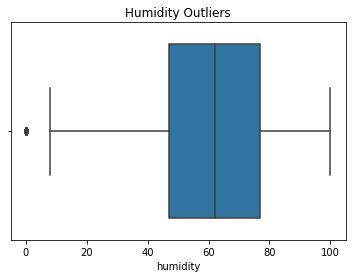

2703 Outliers present for Humidity variable 



In [ ]:
# Outlier detection
sns.boxplot(x = yulu['humidity'])
hum_mean = yulu['humidity'].mean()
hum_IQR = hum_mean/4
hum_out = hum_mean + hum_IQR
y = (np.where(yulu["humidity"]>hum_out))
plt.title("Humidity Outliers")
plt.show()
print(len(y[0]), "Outliers present for Humidity variable \n")

##### **Insight**: *There is count of 2703 outliers on humidity values*

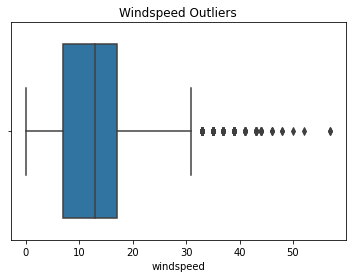

3487 Outliers present for Windspeed variable 



In [ ]:
# Outliers for Windspeed
sns.boxplot(x = yulu['windspeed'])
ws_mean = yulu['windspeed'].mean()
ws_IQR = ws_mean/4
ws_out = ws_mean + ws_IQR
y = (np.where(yulu["windspeed"]>ws_out))
plt.title("Windspeed Outliers")
plt.show()
print(len(y[0]), "Outliers present for Windspeed variable \n")

##### **Insight**: *There is count of 3487 outliers on windspeed values*

### Categorical Variable Analysis

In [ ]:
print(f"Categorical Variables are: {yulu.select_dtypes(['object']).columns}")

Categorical Variables are: Index(['datetime', 'season', 'holiday', 'workingday', 'weather'], dtype='object')


### Visual Analysis
#### Univariate Analysis

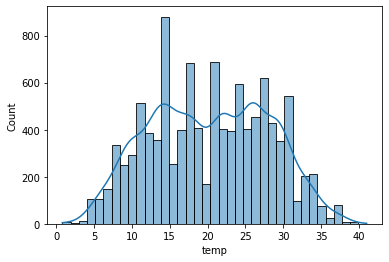

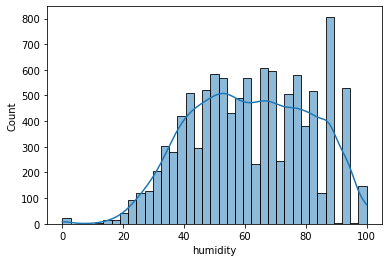

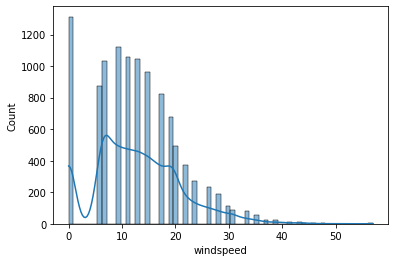

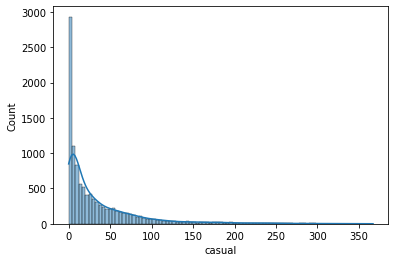

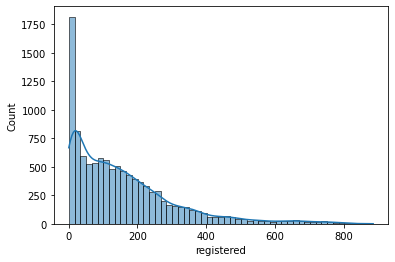

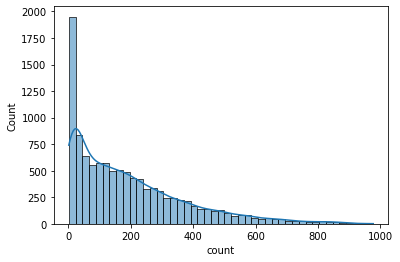

In [ ]:
numerical_columns = yulu.select_dtypes([np.int64, np.float64])
for col in numerical_columns:
  num_graph = sns.histplot(data=yulu, x=col, kde=True) 
  plt.show()
  print()

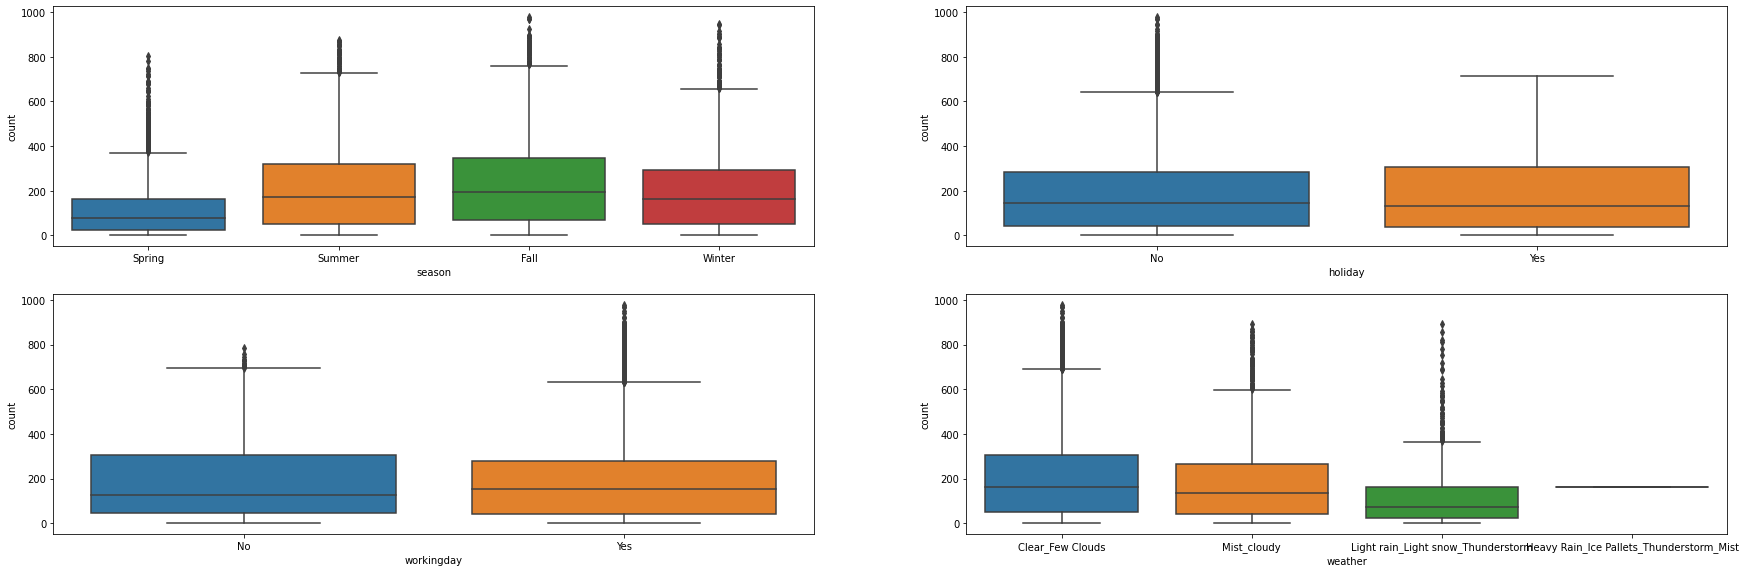

In [ ]:
# Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'count', data = yulu)
plt.subplot(3,2,2)
sns.boxplot(x = 'holiday', y = 'count', data = yulu)
plt.subplot(3,2,3)
sns.boxplot(x = 'workingday', y = 'count', data = yulu)
plt.subplot(3,2,4)
sns.boxplot(x = 'weather', y = 'count', data = yulu)
plt.show()

##### **Insight**: *Spring has less number of sales; while the remaining 3 seasons show almost equal sales*

##### **Insight**: *On weather types - only Clear Sky, Misty and Light Rain types have sales. Remaining weather types have trivial count of Sales*

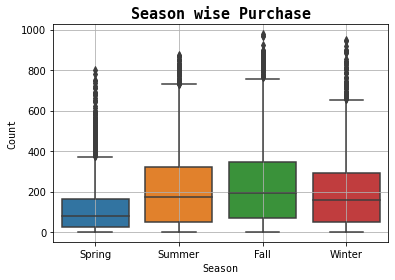

In [ ]:
sns.boxplot(yulu['season'], yulu['count'])
plt.title('Season wise Purchase', fontdict = {'fontname' : 'Monospace', 'fontsize':15, 'fontweight' : 'bold'})
plt.xlabel('Season', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10}) 
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' :10}) 
plt.tick_params(labelsize = 10) 
plt.grid()
plt.show()

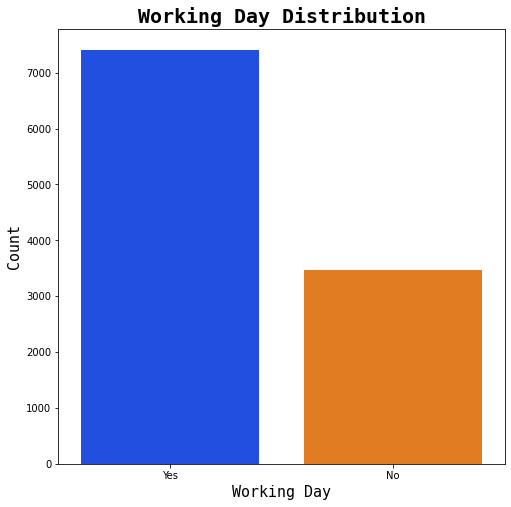

In [ ]:
workday = yulu['workingday'].value_counts()
plt.figure(figsize = (8, 8))
sns.barplot(workday.index, workday.values, palette = 'bright')
plt.title('Working Day Distribution', fontdict = {'fontname' : 'Monospace','fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Working Day', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15}) 
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15}) 
plt.tick_params(labelsize = 10)
plt.show()

##### **Insight**: *Naturally working day has more sales than a non-working day*

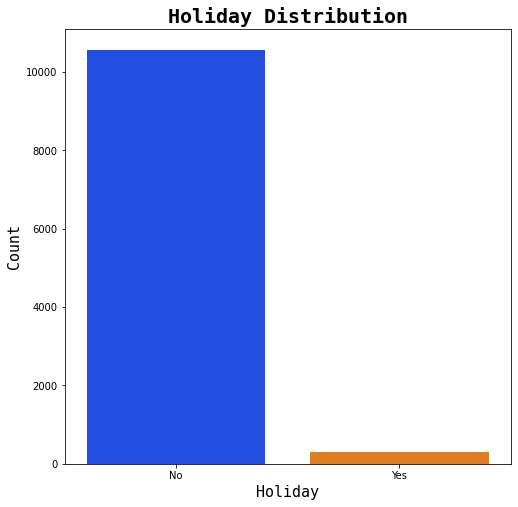

In [ ]:
holiday = yulu['holiday'].value_counts()
plt.figure(figsize = (8, 8))
sns.barplot(holiday.index, holiday.values, palette = 'bright')
plt.title('Holiday Distribution', fontdict = {'fontname' : 'Monospace','fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Holiday', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15}) 
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15}) 
plt.tick_params(labelsize = 10)
plt.show()

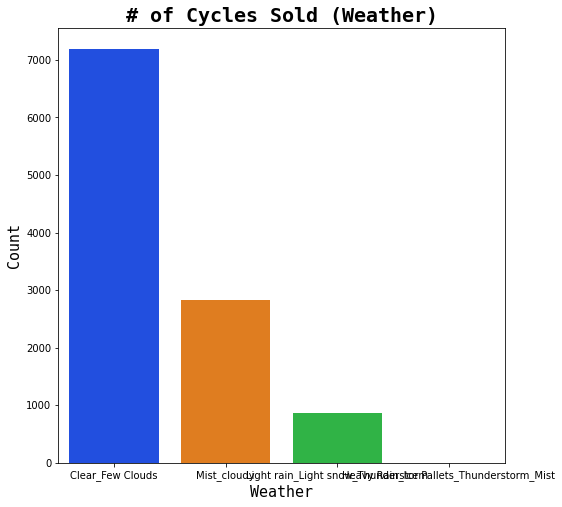

In [ ]:
weather = yulu['weather'].value_counts()
plt.figure(figsize = (8, 8))
sns.barplot(weather.index, weather.values, palette = 'bright')
plt.title('# of Cycles Sold (Weather)', fontdict = {'fontname' : 'Monospace','fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Weather', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15}) 
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15}) 
plt.tick_params(labelsize = 10)
plt.show()

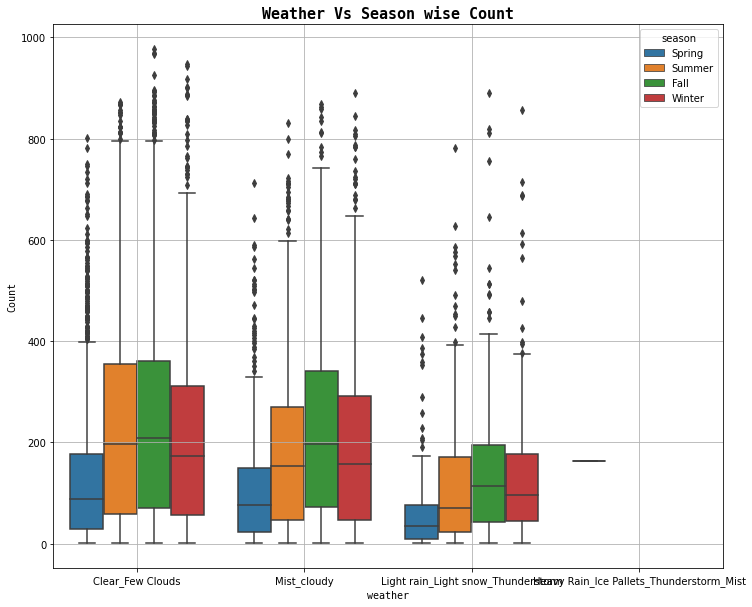

In [ ]:
plt.figure(figsize = (12, 10))
sns.boxplot(yulu['weather'], yulu['count'], hue=yulu['season'])
plt.title('Weather Vs Season wise Count', fontdict = {'fontname' : 'Monospace', 'fontsize': 15, 'fontweight' : 'bold'})
plt.xlabel('weather', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10}) 
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' :10}) 
plt.tick_params(labelsize = 10) 
plt.grid()
plt.show()

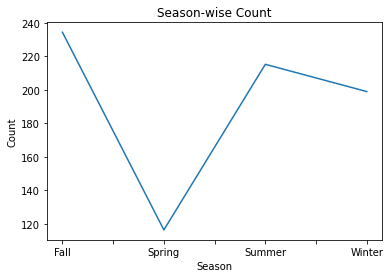

In [ ]:
yulu.groupby('season')['count'].mean().plot()
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season-wise Count')
plt.show()

In [ ]:
yulu['weather'].unique()

array(['Clear_Few Clouds', 'Mist_cloudy',
       'Light rain_Light snow_Thunderstorm',
       'Heavy Rain_Ice Pallets_Thunderstorm_Mist'], dtype=object)

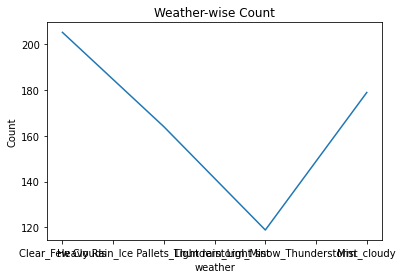

In [ ]:
x_labels = ['Few_Clouds', 'Mist', 'Light_Rain', 'Heavy_Rain']
# yulu.groupby('weather')['count'].mean().plot()
yulu.groupby('weather')['count'].mean().plot()
# plt.xlabel(x_labels)
plt.ylabel('Count')
plt.title('Weather-wise Count')
plt.show()

In [ ]:
labels = []
values = []
for uniqueSeasonValue in yulu['season'].sort_values().unique(): 
  CountData = yulu.loc[yulu['season'] == uniqueSeasonValue] 
  CountMean = np.mean(CountData['count']) 
  labels.append(uniqueSeasonValue) 
  values.append(CountMean)
  print("When Season = ",uniqueSeasonValue,"mean count value is:",CountMean)
  print("--------------------------------------------------------------")

When Season =  Fall mean count value is: 234.417124039517
--------------------------------------------------------------
When Season =  Spring mean count value is: 116.34326135517499
--------------------------------------------------------------
When Season =  Summer mean count value is: 215.25137211855105
--------------------------------------------------------------
When Season =  Winter mean count value is: 198.98829553767374
--------------------------------------------------------------


In [ ]:
labels = []
values = []
for uniqueWeatherValue in yulu['weather'].sort_values().unique(): 
  CountData = yulu.loc[yulu['weather'] == uniqueWeatherValue] 
  CountMean = np.mean(CountData['count']) 
  labels.append(uniqueWeatherValue) 
  values.append(CountMean)
  print("When Weather = ",uniqueWeatherValue,"mean count value is:",CountMean)
  print("------------------------------------------------------------------------------------------")

When Weather =  Clear_Few Clouds mean count value is: 205.23679087875416
------------------------------------------------------------------------------------------
When Weather =  Heavy Rain_Ice Pallets_Thunderstorm_Mist mean count value is: 164.0
------------------------------------------------------------------------------------------
When Weather =  Light rain_Light snow_Thunderstorm mean count value is: 118.84633294528521
------------------------------------------------------------------------------------------
When Weather =  Mist_cloudy mean count value is: 178.95553987297106
------------------------------------------------------------------------------------------


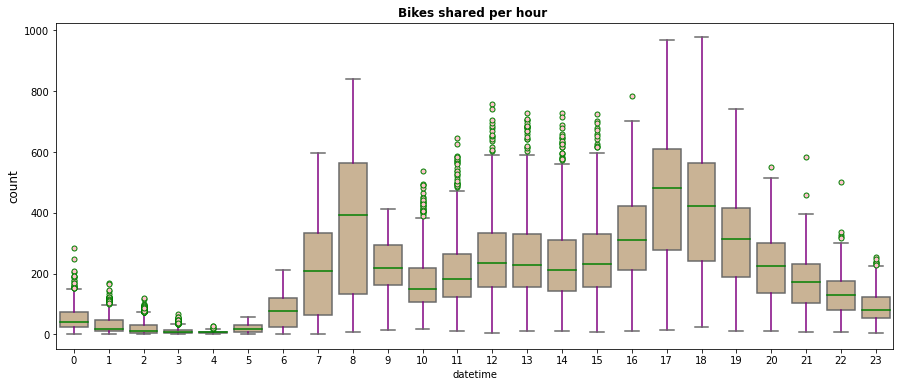

In [6]:
# Hour-wise rental analysis
hour = pd.to_datetime(yulu_df['datetime']).dt.hour

plt.figure(figsize=(15,6))
plt.title("Bikes rented per hour ", fontweight="bold")
plt.ylabel('count', fontsize=12,family = "DejaVu Sans")
sns.boxplot(x = hour, y=yulu_df['count'],orient='vertical',color='tan', whiskerprops=dict(color='purple'),
            flierprops=dict(marker='o', markerfacecolor='pink', markeredgecolor='green'),medianprops=dict(color='green'))
plt.show()

# Hypothesis Testing

In [ ]:
# t-test to check if Working Day has an effect on # of electric cycles rented
wd_rent = yulu_df.groupby('workingday')['count']

In [ ]:
wd_rent.mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

In [ ]:
mean0 = wd_rent.mean().loc[0]
mean1 = wd_rent.mean().loc[1]

In [ ]:
wd_rent.std()

workingday
0    173.724015
1    184.513659
Name: count, dtype: float64

In [ ]:
std0 = wd_rent.std().loc[0]
std1 = wd_rent.std().loc[1]

In [ ]:
wd_rent.count()

workingday
0    3474
1    7412
Name: count, dtype: int64

In [ ]:
cnt0 = wd_rent.count().loc[0]
cnt1 = wd_rent.count().loc[1]

In [ ]:
t_val = (mean0 - mean1) / ( ( (std0*std0)/cnt0 + (std1*std1)/cnt1 )**(1/2) )

In [ ]:
t_val

-1.2362580418223228

##### Annova to see if number of cycles rented is similar or different in different a). weather and b). season

In [ ]:
# Weather
wd_wthr = []
for i in range(1, 5):
  wd_wthr_cnt = yulu_df[yulu_df["weather"] == i]["count"]
  wd_wthr.append(wd_wthr_cnt)

In [ ]:
f_oneway(wd_wthr[0], wd_wthr[1], wd_wthr[2], wd_wthr[3])

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

In [ ]:
# Season
wd_sean = []
for i in range(1, 5):
  wd_sean_cnt = yulu_df[yulu_df["season"] == i]["count"]
  wd_sean.append(wd_sean_cnt)

In [ ]:
f_oneway(wd_sean[0], wd_sean[1], wd_sean[2], wd_sean[3])

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [ ]:
# Chi-square test to check dependency b/w weather and season
contigency= pd.crosstab(yulu_df['season'], yulu_df['weather'])
contigency

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
stat, p_val, dof, expected = chi2_contingency(contigency)

In [ ]:
p_val

1.549925073686492e-07

# Hypothesis Testing 

Null Hypothesis (H0) - Weather and season are not independent.

*   Anova test assumption fails in the case study. As neither variance are equal and disb of variables are normal
*   Variance equality test was done using Levene’s test
*   Normal distribution check was done by using shapiro welch test
*   Practical data never follows normal disb hence mention of non parametric test like Krushkal Welch test
*   Removal of outlier data using IQR principles, visualized using boxplots
*   We fail to reject the Ho when p value is greater than alpha.


1.   Two Sample t-test
    *   t val is 1.26, DOF is 1
    *   for significance level (0.05) for two tailed T test the critical values 
        12.706
    *   Critical value < t val

Thus, we accept the Null Hypothesis that working day has no major effect on # of electric cycles rented

2.   Annova Test

    *   Weather
      *   p value much smaller than 0.05. We reject null hypothesis and no of cycles rented are different in different weather
    *   Season
      *   p value much smaller than 0.05 hence again we reject the null 
          hypothesis. No of cycles rented changes with season

These are similar to the above graphical observations

3.   Chi square Test

    *   p value is 1.549925073686492e-07

Smaller than 0.05 and thus we reject the null hypothesis. 


# Insights

*   Anova test assumption fails in the case study. As neither variance are equal and disb of variables are normal
*   Almost all the four seasons have equal % and count
*   Clear-weather has higher % and Count as compared to other weather types
*   Registered Users have higher % and Count than Casual users
*   There is count of 2703 outliers on humidity values
*   There is count of 3487 outliers on windspeed values
*   Spring has less number of sales; while the remaining 3 seasons show almost equal sales
*   Naturally working day has more sales than a non-working day





# Recommendations

Based on the analysis from the given dataset and the insigths derived, the following recommendations can be proposed: 
*   As there are less number of Casual Users, Yulu can focus on this segment and increase their count by promotions and may be specific models
*   The Users count during rainy seasons is less, which means Yulu may come up with customized cycles to suit thease seasons and increase the customers 
*   Yulu can promote picnics, day-out kind of programmes on non-working days and holidays, to see increased usage on these days
*   Apart the peak months like Jun - Aug, Yulu can attract more Users on remaining months
*   There is a high usage when Windspeed is b/w 13 to 50. Yulu can come up with few aerodynamic models to suit the other windspeeds and increase the User base
*   Similarly there is high usage when the humidity is low. Yulu can attach accessories in the cycles to beat/counter the humidity while riding so that Users & Usage will increase in other humid conditions as well





